# 6-13. 프로젝트 : This is your playground! Leaderboard를 정복해 주세요!

## ✓ 사전 - 기본 프로젝트 처리

#### 참고 사이트 : https://www.kaggle.com/rangmar/25th-solution-xgb-lightgbm-ensemble 

<hr>

### 1. 필요 package 설치

In [1]:
conda install -c conda-forge xgboost=1.3.3

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.1
  latest version: 4.10.3

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - xgboost=1.3.3


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _py-xgboost-mutex-2.0      |            cpu_0           8 KB  conda-forge
    ca-certificates-2021.5.30  |       ha878542_0         136 KB  conda-forge
    certifi-2021.5.30          |   py37h89c1867_0         141 KB  conda-forge
    joblib-1.0.1               |     pyhd8ed1ab_0         206 KB  conda-forge
    libxgboost-1.3.3           |       h9c3ff4c_2 

In [2]:
conda install -c conda-forge lightgbm=3.1.1 

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.1
  latest version: 4.10.3

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - lightgbm=3.1.1


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    lightgbm-3.1.1             |   py37hcd2ae1e_0         1.6 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         1.6 MB

The following NEW packages will be INSTALLED:

  lightgbm           conda-forge/linux-64::lightgbm-3.1.1-py37hcd2ae1e_0



lightgbm-3.1.1       | 1.6 MB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated 

In [3]:
conda install -c conda-forge missingno=0.4.2

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.1
  latest version: 4.10.3

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - missingno=0.4.2


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    missingno-0.4.2            |             py_1          12 KB  conda-forge
    pandas-1.3.1               |   py37h219a48f_0        12.7 MB  conda-forge
    patsy-0.5.1                |             py_0         187 KB  conda-forge
    seaborn-0.11.1             |       hd8ed1ab_1           4 KB  conda-forge
    seaborn-base-0.11.1        |     pyhd8ed1ab_1         217 KB  conda-forge
    statsmodels-0.12.2         |   py37h902c9e0_0        11.3 MB  conda-forge
    ------------------------------------------------------------
                    

### 2. package import

In [19]:
import warnings
warnings.filterwarnings("ignore")

import os
from os.path import join

import pandas as pd
import numpy as np

import missingno as msno

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score
import xgboost as xgb
import lightgbm as lgb

import matplotlib.pyplot as plt
import seaborn as sns


import seaborn as sns
import matplotlib.pyplot as plt
import gc
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
%matplotlib inline

### 3. 데이터 로드

In [6]:
# train_data_path = join('../input', 'train.csv')
# sub_data_path = join('../input', 'test.csv')

data_dir = os.getenv('HOME')+'/aiffel/kaggle_kakr_housing/data'

train_data_path = join(data_dir, 'train.csv')
sub_data_path = join(data_dir, 'test.csv')

train = pd.read_csv(train_data_path)
test = pd.read_csv(sub_data_path)

print(train_data_path)
print(sub_data_path)

/aiffel/aiffel/kaggle_kakr_housing/data/train.csv
/aiffel/aiffel/kaggle_kakr_housing/data/test.csv


### 4. 데이터 살펴보기

pandas의 read_csv 함수를 사용해 데이터를 읽어오고, 각 변수들이 나타내는 의미를 살펴보겠습니다.
1. ID : 집을 구분하는 번호
2. date : 집을 구매한 날짜
3. price : 타겟 변수인 집의 가격
4. bedrooms : 침실의 수
5. bathrooms : 침실당 화장실 개수
6. sqft_living : 주거 공간의 평방 피트
7. sqft_lot : 부지의 평방 피트
8. floors : 집의 층 수
9. waterfront : 집의 전방에 강이 흐르는지 유무 (a.k.a. 리버뷰)
10. view : 집이 얼마나 좋아 보이는지의 정도
11. condition : 집의 전반적인 상태
12. grade : King County grading 시스템 기준으로 매긴 집의 등급
13. sqft_above : 지하실을 제외한 평방 피트
14. sqft_basement : 지하실의 평방 피트
15. yr_built : 집을 지은 년도
16. yr_renovated : 집을 재건축한 년도
17. zipcode : 우편번호
18. lat : 위도
19. long : 경도
20. sqft_living15 : 2015년 기준 주거 공간의 평방 피트(집을 재건축했다면, 변화가 있을 수 있음)
21. sqft_lot15 : 2015년 기준 부지의 평방 피트(집을 재건축했다면, 변화가 있을 수 있음)

In [7]:
data = pd.read_csv(train_data_path)
sub = pd.read_csv(sub_data_path)
print('train data dim : {}'.format(data.shape))
print('sub data dim : {}'.format(sub.shape))

train data dim : (15035, 21)
sub data dim : (6468, 20)


### 5. 참조 사이트 데이터 정의 함수 선언( 실패 후 추가 )

In [15]:
# 각종 함수 참조 : 출처 : https://www.kaggle.com/rangmar/25th-solution-xgb-lightgbm-ensemble

def haversine_array(lat2, lng2):
    lat1, lng1 = 47.63, -122.22
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

def rmse_exp(predictions, dmat):
    labels = dmat.get_label()
    diffs = np.expm1(predictions) - np.expm1(labels)
    squared_diffs = np.square(diffs)
    avg = np.mean(squared_diffs)
    return ('rmse_exp', np.sqrt(avg))

def print_best_params(model, params):
    grid_model = GridSearchCV(
        model, 
        param_grid = params,
        scoring='neg_mean_squared_error',
        cv=5,
        n_jobs=-1
    )

    grid_model.fit(X_train, y_train)
    rmse = np.sqrt(-1*grid_model.best_score_)
    print(
        '{0} 5 CV 시 최적 평균 RMSE 값 {1}, 최적 alpha:{2}'.format(model.__class__.__name__, np.round(rmse, 6), grid_model.best_params_))
    return grid_model.best_estimator_

def zipcode_groupby(train, test, group_col, colname, agg_method) :
    new_colname = 'price_per'+'_'+colname
    #new_colname2 = colname+'mean'
    
    train[new_colname] = train['price']/train[colname]
    price_per_temp = train.groupby([group_col])[new_colname].agg(agg_method)
    price_per_temp.columns = ['{}_{}'.format(new_colname, m) for m in agg_method]
    price_per_temp = price_per_temp.reset_index()
    #price_per_temp.rename(columns={'mean':new_colname2}, inplace=True)
    train = pd.merge(train, price_per_temp, how='left', on=group_col)
    test = pd.merge(test, price_per_temp, how='left', on=group_col)
    
    del train[new_colname]
    
    return train, test

def groupby_helper(df, group_col, target_col, agg_method, prefix_param=None):
    try:
        prefix = get_prefix(group_col, target_col, prefix_param)
        print(group_col, target_col, agg_method)
        group_df = df.groupby(group_col)[target_col].agg(agg_method)
        group_df.columns = ['{}_{}'.format(prefix, m) for m in agg_method]
    except BaseException as e:
        print(e)
    return group_df.reset_index()

def get_prefix(group_col, target_col, prefix=None):
    if isinstance(group_col, list) is True:
        g = '_'.join(group_col)
    else:
        g = group_col
    if isinstance(target_col, list) is True:
        t = '_'.join(target_col)
    else:
        t = target_col
    if prefix is not None:
        return prefix + '_' + g + '_' + t
    return g + '_' + t

def category_feature_distribution(train, col, target='price'):
    fig, ax = plt.subplots(1, 2, figsize=(16,4))
    
    for c in sorted(train[col].unique()):
        sns.distplot(train.loc[train[col]==c, target], ax=ax[0])
    ax[0].legend(sorted(train[col].unique()))
    ax[0].set_title(f'{col} {target} distribution')

    sns.boxplot(x=col, y=target, data=train, ax=ax[1])
    ax[1].set_title(f'{col} vs {target}')
    
    plt.show()
    
def haversine_array_new(lat1_raw, lng1_raw, lat2, lng2):
    lat1, lng1 = lat1_raw, lng1_raw
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

def haversine_array_low(lat2, lng2):
    lat1, lng1 = 47.382, -122.247
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

### 6. 데이터 전처리, feature생성, 시각화 

In [17]:
data_dir = os.getenv('HOME')+'/aiffel/kaggle_kakr_housing/data'

train_data_path = join(data_dir, 'train.csv')
sub_data_path = join(data_dir, 'test.csv')

train = pd.read_csv(train_data_path)
test = pd.read_csv(sub_data_path)

print(train_data_path)
print(sub_data_path)

data = pd.merge(train, test, how='outer')

train_raw = train
train_len = len(train)

data['min_haver'] = np.nan
for i in range(len(data)) :
    temp_lat, temp_lng = data[['lat', 'long']].loc[i,'lat'], data[['lat', 'long']].loc[i,'long']
    temp_all_df = data.drop([i], 0)
    temp_coord_df = haversine_array_new(temp_lat, temp_lng, temp_all_df['lat'], temp_all_df['long'])
    temp_min = temp_coord_df.min()
    data.loc[i,'min_haver'] = temp_min    

/aiffel/aiffel/kaggle_kakr_housing/data/train.csv
/aiffel/aiffel/kaggle_kakr_housing/data/test.csv


In [20]:
######## zipcode 라벨링
train = data.iloc[:train_len,:]
test = data.iloc[train_len:,:]

for df in [train, test] :
    #df['zip_1'] = df['zipcode'].apply(lambda x : str(x)[2]).astype(int)
    df['zip_12'] = df['zipcode'].apply(lambda x : str(x)[2:4]).astype(int)
    #df['zip_2'] = df['zipcode'].apply(lambda x : str(x)[3]).astype(int)
    #df['zip_23'] = df['zipcode'].apply(lambda x : str(x)[3:5]).astype(int)
    #df['zip_3'] = df['zipcode'].apply(lambda x : str(x)[4]).astype(int)

le = LabelEncoder()

le.fit(train['zipcode'])
le.fit(test['zipcode'])

train['zipcode'] = le.transform(train['zipcode'])
test['zipcode'] = le.transform(test['zipcode'])

train['sqft_total_size'] = train['sqft_above'] + train['sqft_basement'] # 총 주거 면적    
test['sqft_total_size'] = test['sqft_above'] + test['sqft_basement']

####### zipcode_groupby 단가 변수 생성
train['price_per_land_area'] = train['price'] / (train['sqft_living'])
price_per_ft = train.groupby(['zipcode'])['price_per_land_area'].agg({'mean', 'std', 'count'}).reset_index()
train = pd.merge(train, price_per_ft, how='left', on='zipcode')
test = pd.merge(test, price_per_ft, how='left', on='zipcode')
del train['price_per_land_area']

####### train, test set 지정

X_train = train.drop(['id', 'price'], 1)
y_train = train['price']
y_train = np.log1p(y_train)
X_test = test.drop(['id', 'price'], axis=1)

####### KMeans Clustering
km_n = 120
km = KMeans(n_clusters=km_n, random_state=2019)
km.fit(X_train[['lat', 'long']])#

######## 이외 Feature Engineering
for df in [X_train, X_test]:
    df['date(new)'] = df['date'].apply(lambda x: int(x[4:8])+800 if x[:4] == '2015' else int(x[4:8])-400) # 날짜 줄 세우기
    df['how_old'] = df['date'].apply(lambda x: x[:4]).astype(int) - df[['yr_built', 'yr_renovated']].max(axis=1) # 얼마나 됐는지 연식
    df['yr_built'] = df['yr_built'] - 1900 # 건축년도 1900년도로부터 얼마나 됐는지 
    
    # sqft 관련
    df['sqft_diff'] = df['sqft_living15'] - df['sqft_living']
    df['sqft_living_lot_diff'] = df['sqft_lot'] - df['sqft_living']
    #df['sqft_living_lot_div'] = df['sqft_living'] / df['sqft_lot']
    del df['sqft_lot15'], df['yr_renovated'], df['sqft_lot'],df['date']#, df['waterfront']#, df['view'], df['condition']
    
    #df['sqft_living_all'] = df['sqft_living'] + df['sqft_living15']
    #df['living_div'] = df['sqft_living15'] / df['sqft_living_all']    
    
    # 방 관련
    df['sqft_bedrooms'] = df['sqft_total_size'] / (df['bedrooms'] + 1) # 방하나당 면적 : bedrooms가 0인 자료 꽤 있음 
    
    
    # KMeans 클러스터링
    km_col_name = 'km'+ '_' + str(km_n)
    df[km_col_name] = km.predict(df[['lat', 'long']])
    
    # 레벨 관련
    df['sum_level'] = df['grade'] + df['view'] + df['condition'] # 등급 총합
    df['multi_level'] = df['grade'] * (df['view']+1) * df['condition']
    
    df['condition_2'] = df['condition'].apply(lambda x : 0 if x < 3 else x)
    df['sum_level_2'] = df['view'] + df['condition_2'] + df['grade']
    
    del df['condition_2']
    
    df['low_cond']=df['condition'].apply(lambda x : 0 if x <= 2 else 1)
    df['low_view'] = df['view'].apply(lambda x : 0 if x == 0 else 1)
    df['low_bath'] = df['bathrooms'].apply(lambda x: 0 if x < 1 else 1)
    df['low_bed'] = df['bedrooms'].apply(lambda x : 0 if x ==1 else 1)
    df['low_grade'] = df['grade'].apply(lambda x : 0 if x <= 6 else 1)
    df['low_all'] = (df['low_cond'] + df['low_view']+df['low_bath'] + df['low_bed'] + df['low_grade']) + df['waterfront']
    
    del df['low_cond'], df['low_view'], df['low_bath'], df['low_bed'], df['low_grade']
   
    # 거리 관련
    df['haversine_dist']= haversine_array(df['lat'], df['long']) # 중심가로부터의 거리 (haversine_dist)
    df['haversine_dist_low'] = haversine_array_low(df['lat'], df['long'])
    #df['min_haver_multi'] = df['min_haver'] * df['haversine_dist'] 

# 로그화
for i in ['sqft_living', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_total_size', 'sqft_bedrooms'] :
    X_train[i] = np.log1p(X_train[i])
    X_test[i] = np.log1p(X_test[i])
    
X_train = X_train.drop([13522, 4123],0)
y_train = y_train.drop([13522, 4123],0)

X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

print(len(X_train.columns), X_train.columns)
print([item for item in X_train.columns if item not in train_raw.columns])

33 Index(['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'zipcode', 'lat', 'long', 'sqft_living15', 'min_haver', 'zip_12',
       'sqft_total_size', 'mean', 'count', 'std', 'date(new)', 'how_old',
       'sqft_diff', 'sqft_living_lot_diff', 'sqft_bedrooms', 'km_120',
       'sum_level', 'multi_level', 'sum_level_2', 'low_all', 'haversine_dist',
       'haversine_dist_low'],
      dtype='object')
['min_haver', 'zip_12', 'sqft_total_size', 'mean', 'count', 'std', 'date(new)', 'how_old', 'sqft_diff', 'sqft_living_lot_diff', 'sqft_bedrooms', 'km_120', 'sum_level', 'multi_level', 'sum_level_2', 'low_all', 'haversine_dist', 'haversine_dist_low']


In [21]:
X_train['price'] = y_train
km2 = KMeans(n_clusters=120, random_state=2019)
km2.fit(X_train[['price', 'km_120']])
X_train['km_pre'] = km2.predict(X_train[['price', 'km_120']])
X_train.drop('price', 1, inplace=True)
X_train_km_pre = X_train[['km_120', 'km_pre']].groupby('km_120')['km_pre'].mean().reset_index()
X_test = X_test.merge(X_train_km_pre, how='left', on='km_120')

#### 신규 Feature 설명

* min_haver : 이웃 중 가장 가까운 곳과의 거리 (허태명님의 커널 참고)
* zip_12 : zipcode 중 98을 제외한 1,2번째 숫자 (허태명님의 커널 참고)
* sqft_total_size : sqft_above + sqft_basement
* std, mean, count : std, mean은 zipcode별 price/sqft_total_size의 표준편차, 평균, count는 zipcode별 count 횟수
* date(new), how_old : (DongGyu Lee님의 커널 참고)
* sqft_diff : sqft_living15 - sqft_living
* sqft_living_lot_diff : sqft_lot - sqft_living
* sqft_bedrooms : sqft_living / (sqft_bedrooms + 1)
* sum_level : grade + view + condition
* multi_level : grade view condition
* sum_level_2 : view + condition(3미만인 것은 0으로 치환) + grade
* low_all : condtion(2이하는 0, 나머지는 1) + view(0인것은 0 나머지는 1) + bath(1미만은 0 나머지는 1) + bed(1이면 0 나머지는 1) + grade(6이하면 0, 나머지는 1) + waterfront
* haversine_dist : 47.63, -122.22으로부터 거리
* haversine_dist_low : 47.382, -122.247
* km_120 : 120개로 KMeans 클러스터링 lat, long
* km_pre : price와 km_120 KMeans 클러스터링 후 test set에는 merge
* multi_level까지는 대부분 아실거라 생각합니다. 그 이후 나오는 것들에 대해 시각화를 진행하고자 합니다.

1) haversine_dist, haversine_dist_low

#### 시각화 진행

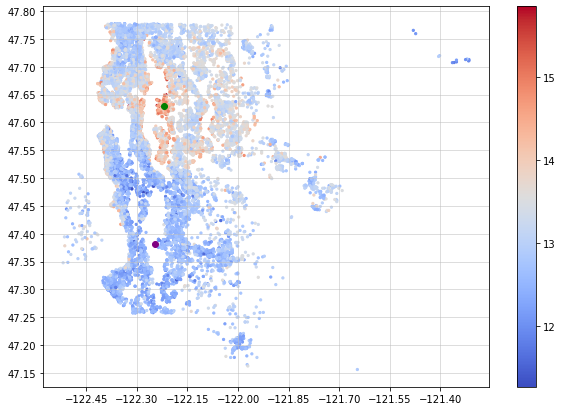

In [22]:
plt.figure(figsize=(10,7))
plt.scatter(data['long'], data['lat'], s=5, c=np.log1p(data['price']), cmap='coolwarm')
plt.yticks(np.arange(47, 47.81, 0.05))
plt.xticks(np.arange(-122.6, -121.2, 0.15))
plt.grid(color='#BDBDBD', linestyle='-', linewidth=0.5)
plt.colorbar()
plt.scatter(-122.22, 47.63, color='green')
plt.scatter(-122.247, 47.382, color='purple')

위를 보시면, 제가 기준점으로 쓴 점들이 초록색과 보라색으로 보입니다.
저는 제가 보기에 가장 빨간색과 파란색(가격이 높고 낮은) 점이 많이 있는 곳의 중간의 lat, long을 기준점으로 삼았습니다.
가격이 낮은 곳으로부터 거리는 모르겠지만 가격이 높은 것으로부터 거리는 점수 상승에 많은 기여를 했습니다.
이 커널을 참고하시면 더 많은 정보를 얻으실 수 있습니다. https://www.kaggle.com/gaborfodor/from-eda-to-the-top-lb-0-367

<AxesSubplot:xlabel='low_all', ylabel='price'>

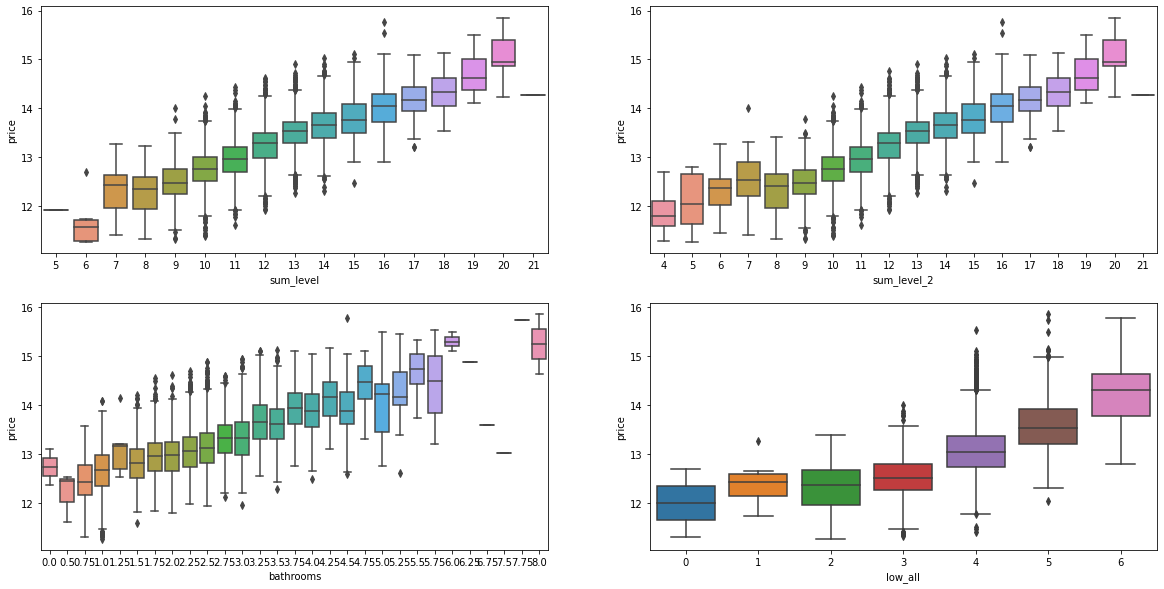

In [23]:
X_train['price'] = y_train
f, ax =  plt.subplots(2,2, figsize=(20, 10))
sns.boxplot(x='sum_level', y='price', data=X_train, ax=ax[0,0])
sns.boxplot(x='sum_level_2', y='price', data=X_train, ax=ax[0,1])
sns.boxplot(x='bathrooms', y='price', data=X_train, ax=ax[1,0])
sns.boxplot(x='low_all', y='price', data=X_train, ax=ax[1,1])

저는 이번 대회 내내 oof를 통해서 제가 설계하는 모델이 log 변환후 12미만 가격을 제대로 예측하지 못 한다는 걸 알게됐습니다.
이에 어떻게 하면, 12미만 가격의 집값을 예측할지 고민하며 만든 feature가 sum_level_2와 low_all입니다.
점수상승에 그렇게까지 큰 기여를 했는지는 의문이네요;

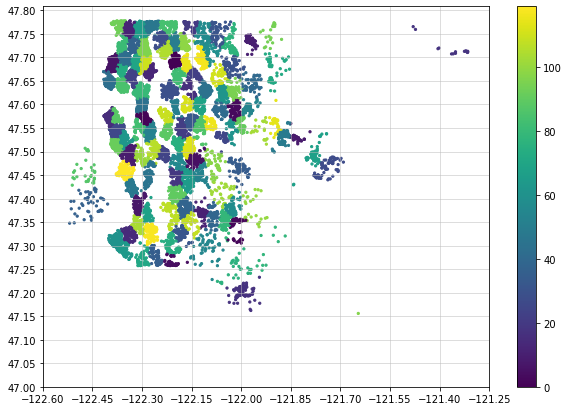

In [24]:
plt.figure(figsize=(10,7))
plt.scatter(X_train['long'], X_train['lat'], s=5, c=X_train['km_120'])
plt.yticks(np.arange(47, 47.81, 0.05))
plt.xticks(np.arange(-122.6, -121.2, 0.15))
plt.grid(color='#BDBDBD', linestyle='-', linewidth=0.5)
plt.colorbar()

저는 허태명님의 커널과 달리 좀 더 많은 클러스터로 나눠보았습니다 (120)
그리고 이를 바탕으로 km120과 price를 kmeans 후 X_test에 km120 기준으로 merge를 해보았습니다

In [25]:
# 가격 삭제
X_train.drop('price', 1, inplace=True)

## 7. 파라미터 조정, 모델 생성 훈련 및 결과업로드

In [26]:
%%time
dtrain = lgb.Dataset(X_train, label=y_train)
dtest  = lgb.Dataset(X_test)

lgb_params = {
    'boosting_type': 'gbdt',
    'objective':'regression',
    'num_leave' : 1,
    'learning_rate' : 0.03,
    'max_depth' : 6,
    'colsample_bytree' : 0.4,
    'subsample' : 0.4,
    'max_bin' : 80,
    'gpu_id':0,         
    'tree_method':'gpu_hist',
    'predictor':'gpu_predictor',
    'refit':True,
    'metric' : 'rmse',
    'seed' : 2019
}

cv_lgb_output = lgb.cv(lgb_params, dtrain, num_boost_round=5000, nfold=5, early_stopping_rounds=200, verbose_eval=100,stratified=False)

print('best_num_rounds :',len(cv_lgb_output['rmse-mean']))
print('best_cv_score :', cv_lgb_output['rmse-mean'][-1])

best_num_rounds = len(cv_lgb_output['rmse-mean'])

model_lgb = lgb.train(lgb_params, dtrain, num_boost_round=best_num_rounds)
lgb_pred_log = model_lgb.predict(X_test)
lgb_pred = np.expm1(lgb_pred_log)

[LightGBM] [Warning] Unknown parameter: refit
[LightGBM] [Warning] Unknown parameter: num_leave
[LightGBM] [Warning] Unknown parameter: gpu_id
[LightGBM] [Warning] Unknown parameter: predictor
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: refit
[LightGBM] [Warning] Unknown parameter: num_leave
[LightGBM] [Warning] Unknown parameter: gpu_id
[LightGBM] [Warning] Unknown parameter: predictor
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: refit
[LightGBM] [Warning] Unknown parameter: num_leave
[LightGBM] [Warning] Unknown parameter: gpu_id
[LightGBM] [Warning] Unknown parameter: predictor
[LightGBM] [Warning] Unknown parameter: tree_method
[Ligh

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[600]	cv_agg's rmse: 0.157592 + 0.00103621
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[800]	cv_agg's rmse: 0.156824 + 0.000853767
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

best_num_rounds : 1223
best_cv_score : 0.1564893370541673
[LightGBM] [Warning] Unknown parameter: refit
[LightGBM] [Warning] Unknown parameter: num_leave
[LightGBM] [Warning] Unknown parameter: gpu_id
[LightGBM] [Warning] Unknown parameter: predictor
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: refit
[LightGBM] [Warning] Unknown parameter: num_leave
[LightGBM] [Warning] Unknown parameter: gpu_id
[LightGBM] [Warning] Unknown parameter: predictor
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: refit
[LightGBM] [Warning] Unknown parameter: num_leave
[LightGBM] [Warning] Unknown parameter: gpu_id
[LightGBM] [Warning] Unknown parameter: predictor

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[08:09:55] WARNING: ../src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[08:09:55] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:09:55] WARNING: ../src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[08:09:55] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:09:55] WARNING: ../src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squar

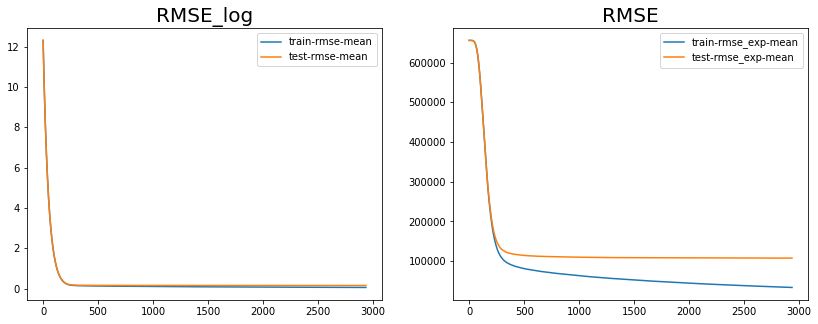

In [27]:
xgb_params = {
    'eta': 0.02,
    'max_depth': 6,
    'subsample': 0.8,
    'colsample_bytree': 0.4,
    'objective': 'reg:linear',    
    'eval_metric': 'rmse',        
    'silent': True,               
    'seed' : 1984
}



# transform
dtrain = xgb.DMatrix(X_train, y_train)
dtest = xgb.DMatrix(X_test)

# cross validation
cv_output = xgb.cv(xgb_params,
                   dtrain,                        
                   num_boost_round=5000,         
                   early_stopping_rounds=150,    
                   nfold=5,                      
                   verbose_eval=100,             
                   feval=rmse_exp,               
                   maximize=False,
                   show_stdv=False,              
                   )

# scoring
best_rounds = cv_output.index.size
score = round(cv_output.iloc[-1]['test-rmse_exp-mean'], 2)

print(f'\nBest Rounds: {best_rounds}')
print(f'Best Score: {score}')

model = xgb.train(xgb_params, dtrain, num_boost_round=best_rounds)
xgb_pred_log = model.predict(dtest)
xgb_pred = np.expm1(xgb_pred_log)

# plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))
cv_output[['train-rmse-mean', 'test-rmse-mean']].plot(ax=ax1)
ax1.set_title('RMSE_log', fontsize=20)
cv_output[['train-rmse_exp-mean', 'test-rmse_exp-mean']].plot(ax=ax2)
ax2.set_title('RMSE', fontsize=20)

plt.show()

### 성공 점수 : 102919

In [28]:
ensemble_pred = np.vstack([lgb_pred, xgb_pred]).mean(0)
sample_submission = pd.read_csv(os.getenv('HOME')+'/aiffel/kaggle_kakr_housing/data/sample_submission.csv')

submission = pd.DataFrame(data = {'id': test['id'], 'price': ensemble_pred})
submission.to_csv('submission_ensemble.csv', index=False)

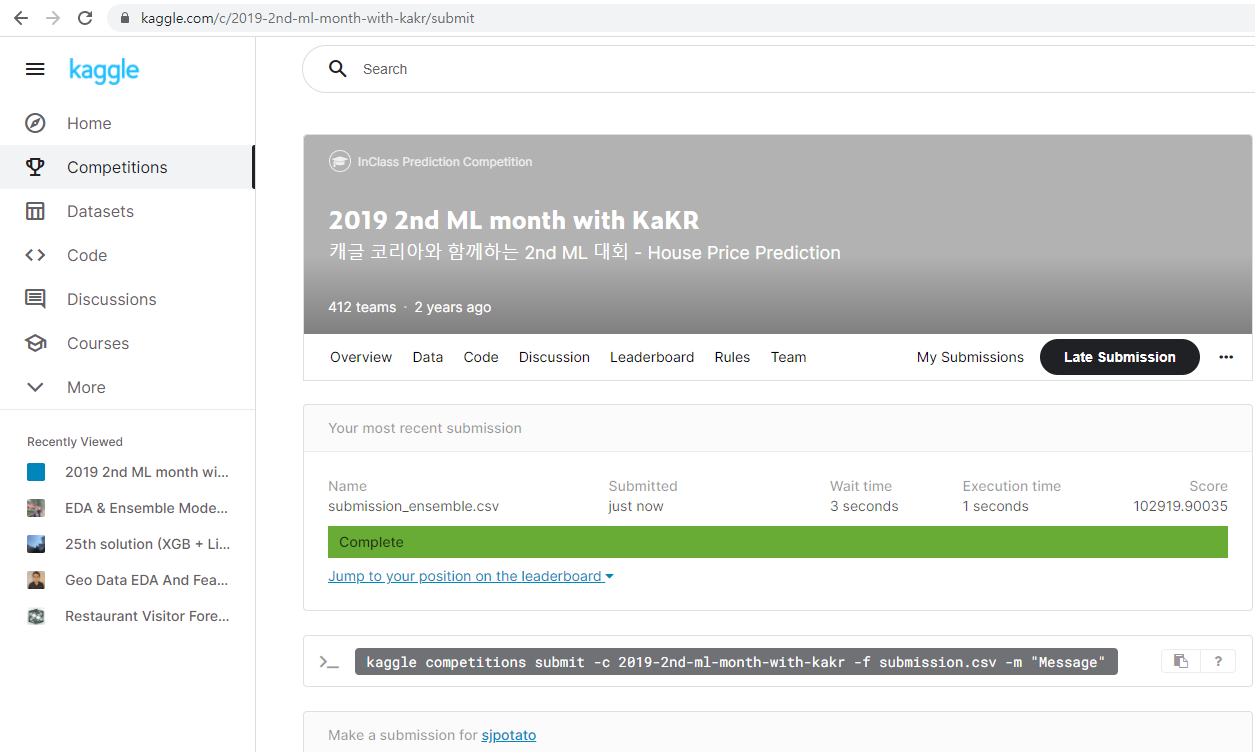

## 8. 하이퍼 파라미터 튜닝(실패한 이력)

**참고 사이트 참고 전 수행이력**

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [37]:
# 데이터 읽기
data_dir = os.getenv('HOME')+'/aiffel/kaggle_kakr_housing/data'

train_data_path = join(data_dir, 'train.csv')
test_data_path = join(data_dir, 'test.csv') 

train = pd.read_csv(train_data_path)
test = pd.read_csv(test_data_path)

In [38]:
# 데이터 가공

y = train['price']
del train['price']
y = np.log1p(y)

train['date'] = train['date'].apply(lambda i: i[:6]).astype(int)
train.head()

del train['id']
print(train.columns)
test['date'] = test['date'].apply(lambda i: i[:6]).astype(int)

del test['id']

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


### 1. LGBMRegressor


In [39]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

In [40]:
def my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5):
    # GridSearchCV 모델로 초기화
    grid_model = GridSearchCV(model, param_grid=param_grid, scoring='neg_mean_squared_error', \
                              cv=5, verbose=verbose, n_jobs=n_jobs)
    
    # 모델 fitting
    grid_model.fit(train, y)

    # 결과값 저장
    params = grid_model.cv_results_['params']
    score = grid_model.cv_results_['mean_test_score']
    
    # 데이터 프레임 생성
    results = pd.DataFrame(params)
    results['score'] = score
    
    # RMSLE 값 계산 후 정렬
    results['RMSLE'] = np.sqrt(-1 * results['score'])
    results = results.sort_values('RMSLE')

    return results

In [45]:
def save_submission(model, train, y, test, model_name, rmsle=None):
    model.fit(train, y)
    prediction = model.predict(test)
    prediction = np.expm1(prediction)
    data_dir = os.getenv('HOME')+'/aiffel/kaggle_kakr_housing/data'
    submission_path = join(data_dir, 'sample_submission.csv')
    submission = pd.read_csv(submission_path)
    submission['price'] = prediction
    submission_csv_path = '{}/submission_{}_RMSLE_{}.csv'.format(data_dir, model_name, rmsle)
    submission.to_csv(submission_csv_path, index=False)
    print('{} saved!'.format(submission_csv_path))

In [42]:
# random_state는 모델초기화나 데이터셋 구성에 사용되는 랜덤 시드값입니다. 
#random_state=None    # 이게 초기값입니다. 아무것도 지정하지 않고 None을 넘겨주면 모델 내부에서 임의로 선택합니다.  
random_state=2020        # 하지만 우리는 이렇게 고정값을 세팅해 두겠습니다. 

gboost = GradientBoostingRegressor(random_state=random_state)
xgboost = XGBRegressor(random_state=random_state)
lightgbm = LGBMRegressor(random_state=random_state)
rdforest = RandomForestRegressor(random_state=random_state)

models = [gboost, xgboost, lightgbm, rdforest]


### 튜닝 테스트 1

In [43]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [1, 10],
    'learning_rate': [0.08],
    'boosting' : ['dart'],
}
model = LGBMRegressor(random_state=random_state)
result = my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5)
result

Fitting 5 folds for each of 4 candidates, totalling 20 fits


,boosting,learning_rate,max_depth,n_estimators,score,RMSLE
3,dart,0.08,10,100,-0.976754,0.988309
1,dart,0.08,1,100,-1.031445,1.015601
2,dart,0.08,10,50,-1.092121,1.045046
0,dart,0.08,1,50,-1.166688,1.080133


In [46]:
# 0.9883 -> 113112.14053 점
save_submission(model, train, y, test, 'lgbm', rmsle='0.9883')  

/aiffel/aiffel/kaggle_kakr_housing/data/submission_lgbm_RMSLE_0.9883.csv saved!


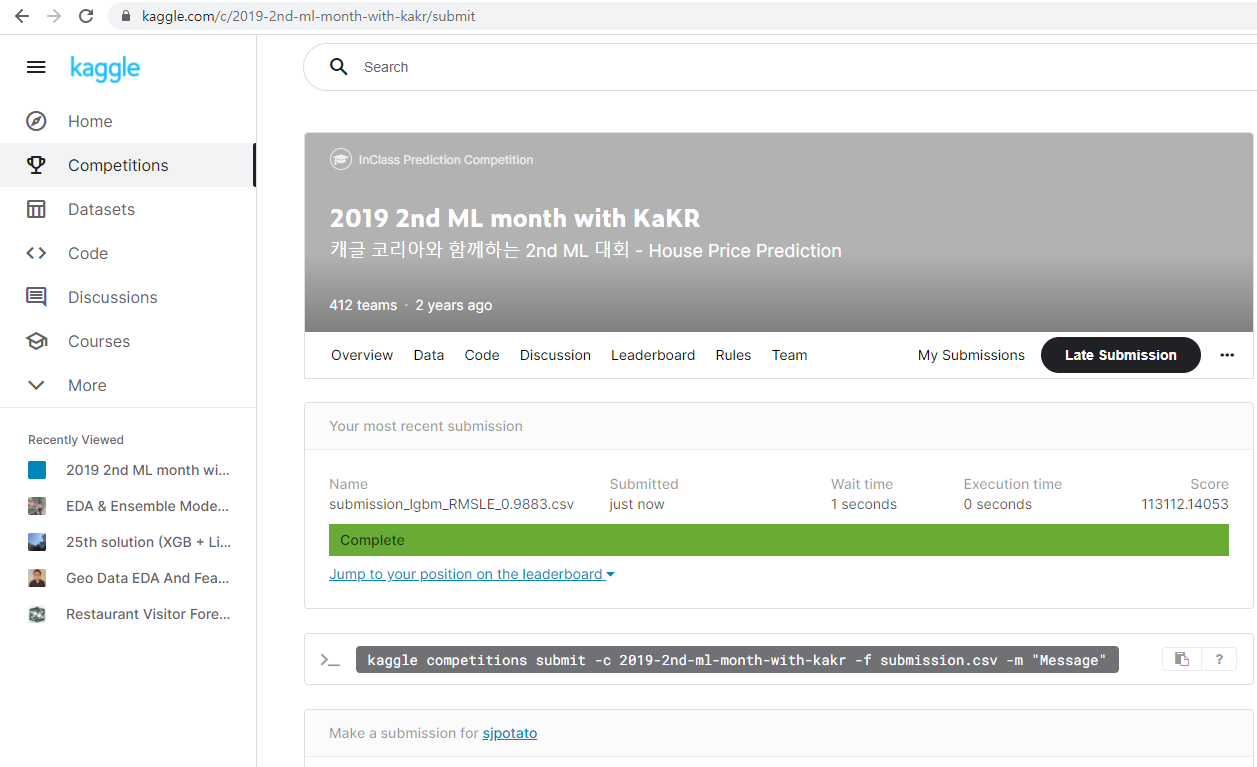

### 튜닝 테스트 2

'n_estimators': [150, 200], 'max_depth': [1, 10],

'learning_rate': [0.05], 'num_leaves' : [32],

In [50]:
# param 설정
param_grid = {
    'n_estimators': [150, 200],
    'max_depth': [1, 10],
    'learning_rate': [0.05],
    'num_leaves' : [32],
}

# 훈련
model = LGBMRegressor(random_state=random_state)
result = my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5)
result

Fitting 5 folds for each of 4 candidates, totalling 20 fits


,learning_rate,max_depth,n_estimators,num_leaves,score,RMSLE
3,0.05,10,200,32,-0.026765,0.163601
2,0.05,10,150,32,-0.027403,0.165538
1,0.05,1,200,32,-0.055456,0.235492
0,0.05,1,150,32,-0.062081,0.249161


In [51]:
# 0.163601 -> 113112.14053
save_submission(model, train, y, test, 'lgbm', rmsle='0.163601')

/aiffel/aiffel/kaggle_kakr_housing/data/submission_lgbm_RMSLE_0.163601.csv saved!


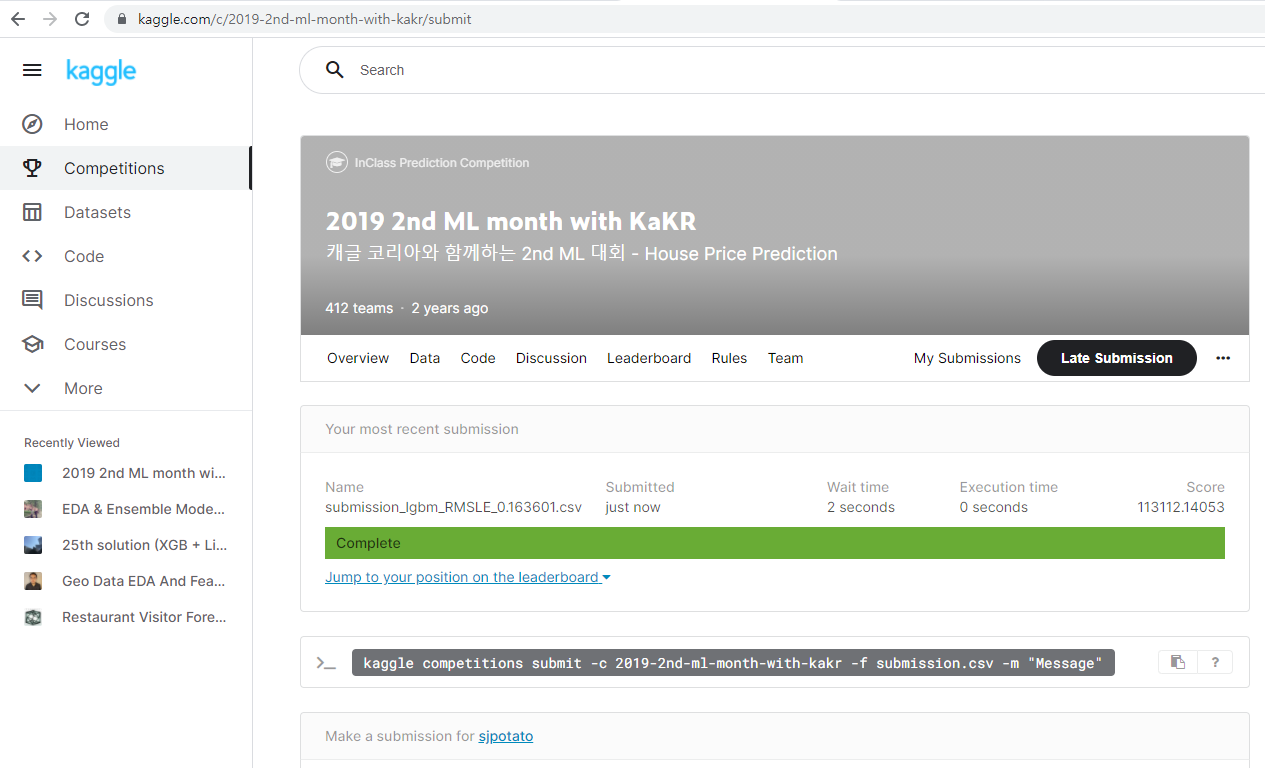

## 2. XGBRegressor

### 튜닝테스트 3

In [52]:
# param 설정
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [1, 10],
    'learning_rate': [0.01],
    'num_leaves' : [16],
}

# 훈련
model = XGBRegressor(random_state=random_state)
result = my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5)
result

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[08:51:17] WARNING: ../src/learner.cc:541: 
Parameters: { num_leaves } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




,learning_rate,max_depth,n_estimators,num_leaves,score,RMSLE
7,0.01,10,200,16,-2.892440,1.700717
3,0.01,1,200,16,-2.946173,1.716442
6,0.01,10,150,16,-7.809628,2.794571
2,0.01,1,150,16,-7.862215,2.803964
5,0.01,10,100,16,-21.218815,4.606388
1,0.01,1,100,16,-21.266610,4.611573
4,0.01,10,50,16,-57.813905,7.603546
0,0.01,1,50,16,-57.852028,7.606052


In [54]:
# 저장
save_submission(model, train, y, test, 'xgb', rmsle='1.700717')

/aiffel/aiffel/kaggle_kakr_housing/data/submission_xgb_RMSLE_1.700717.csv saved!


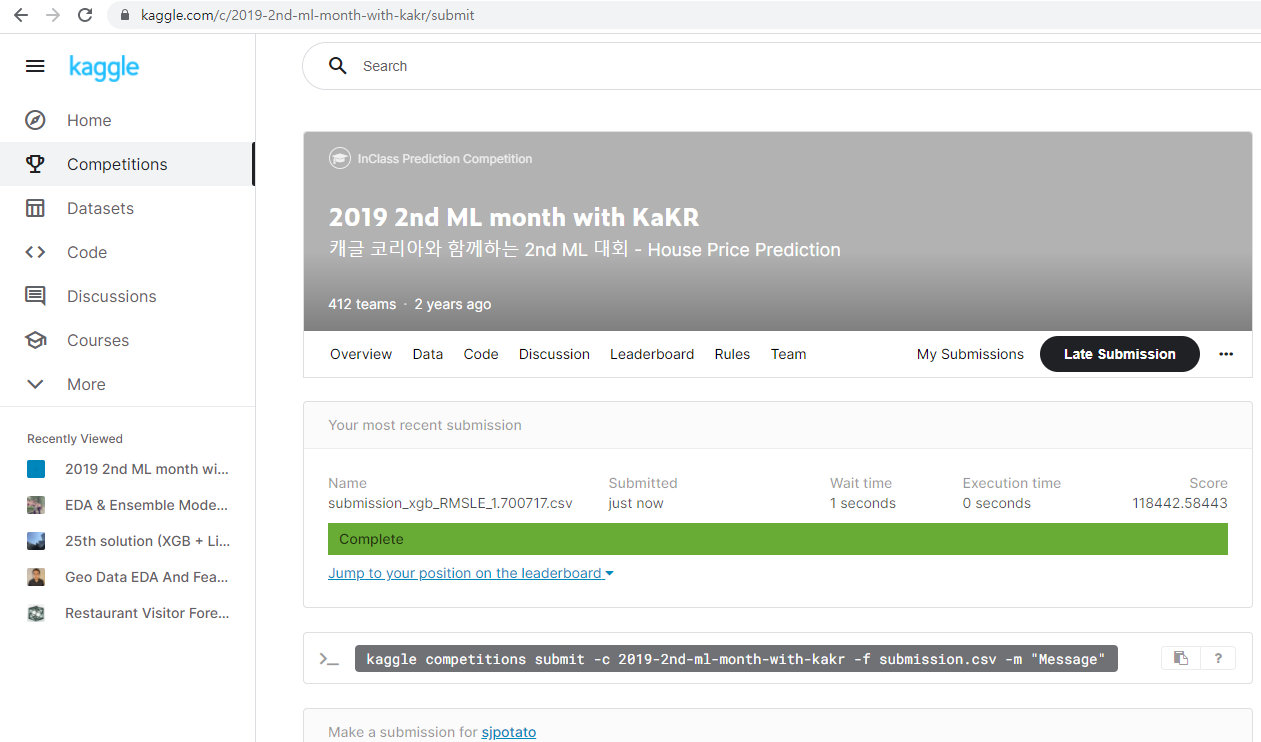

### 회고

#### 1. 이번 프로젝트에서 어려웠던 점

* 데이터 전처리, 데이터 시각화, 모델 훈련의 파라미터 조정이 다 어려웠음
 


#### 2. 프로젝트를 진행하면서 알아낸 점 혹은 아직 모호한 점.

* 알아낸 점

  1) 캐글에 도전하는 방법 
  
  2) 데이터를 바라보는 관점
  
  3) 아무리 좋은 모델과 하이퍼파라미터여도, 앞의 데이터 전처리가 잘 되어있지 않으면 아무 의미 없다는 것을 알게됨
  
  

* 모호한 점

  1) 주어진 데이터를 가지고 어디까지 전처리 해야하는지..
  
  2) 데이터의 시각화는 어디까지 해아하는지..
  
  3) 데이터 시각화로 figure를 판단하는 법 등


#### 3. 루브릭 평가 지표를 맞추기 위해 시도한 것들.

  * 처음에는 파라미터 값을 계속 수정하고, 모델을 몇 개 변경하면서 진행
  
  * 잘 되어있는 캐글 결과를 거의 복사 붙여넣기 하듯이 시도
  


4. 만약에 루브릭 평가 관련 지표를 달성 하지 못했을 때, 이유에 관한 추정.

 * 데이터의 전처리(분석, 피처생성 등) 가 LMS의 커리큘럼 수준 밖에 진행하지 않아서 점수가 안 나왔던 것
    
 


#### 5. 자기 다짐

* 앞으로는 잘 되어있는 캐글을 참조하면서 데이터 전처리/시각화 및 데이터에 맞는 좋은 모델을 작성해야겠음
